# Wine K-Means Clustering without sklearn

![](https://lh3.googleusercontent.com/proxy/tcP2OagZAOEdGKcssJl_o_zwPoLeoheTCTeZhyjZ5FczNDphYiVrwaQ-h3PJ3iZy_Fs1pYHrm-Ndgytjn0Je6YmbBrbasuP5XMWop1zb6eE)

## Problem

In this Kaggle Notebook we would try to answer the following question: **given the diferent attributes of several wines, could we succesfully create clusters of them to extract key information that defines them?**

## Proposed Solution

We would use **K-Means** and **Principal Component Analysis** in order to cluster our different wines in three distinct groups. 

In [1]:
import numpy as np 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Exploratory Analysis

Importing the data, taking a look a the values we would be working with, and finding whether there are any null values in the dataset.

In [2]:
df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
cust=df['Customer_Segment']

In [5]:
df.drop('Customer_Segment', axis=1, inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Looking at **basic statistical details** about the attributes in our dataset and a pairplot with some of them. 

In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


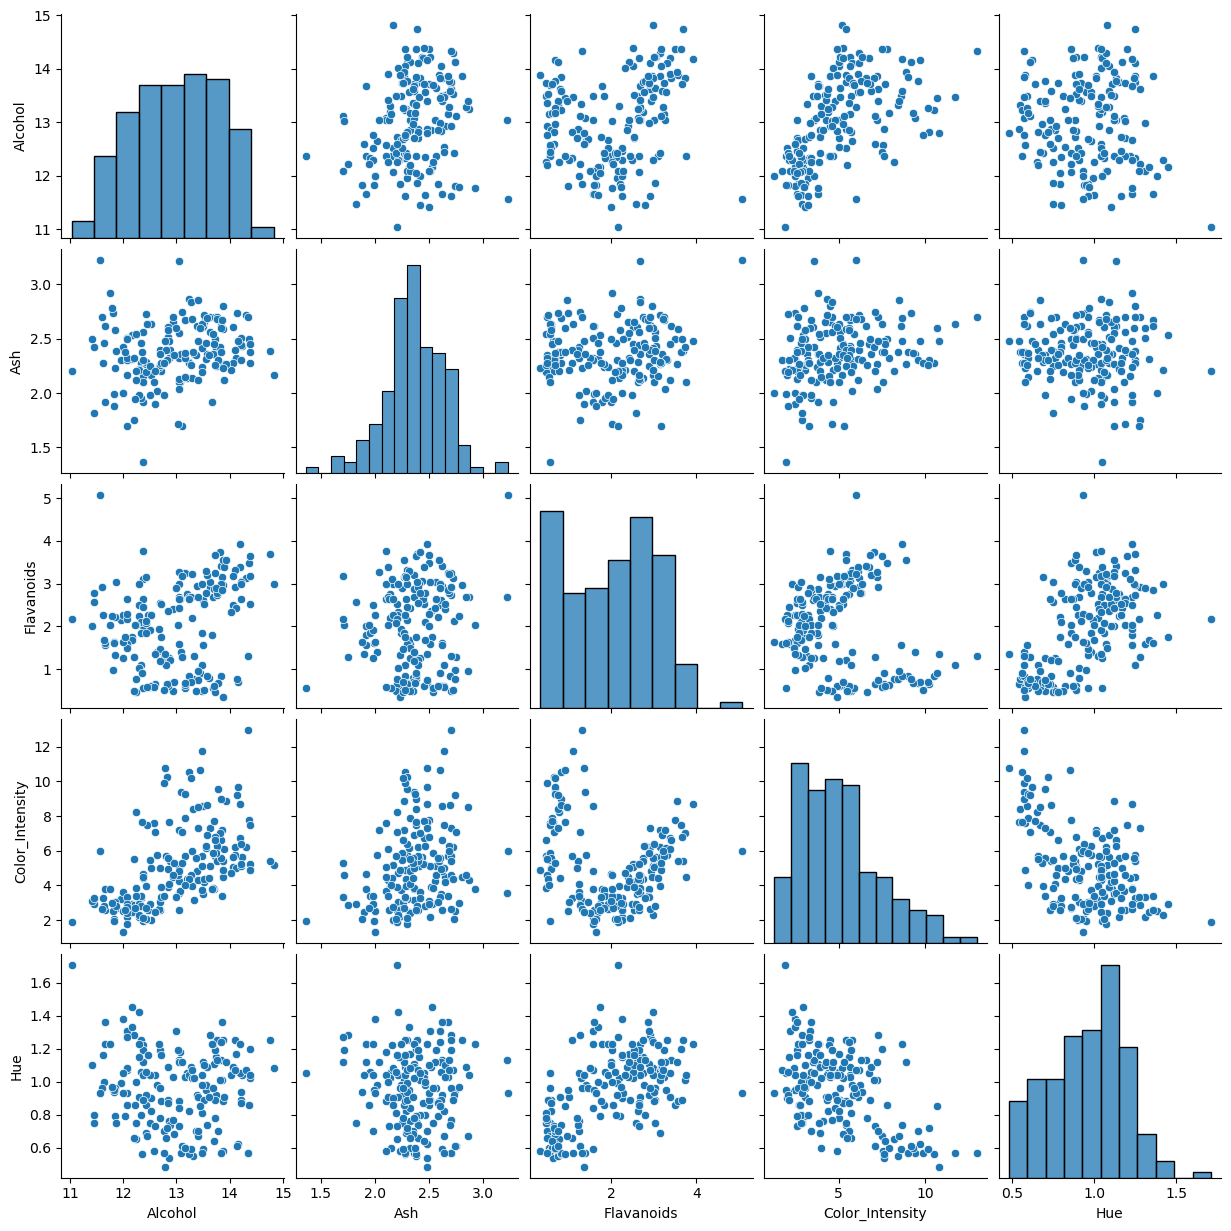

In [7]:
dfPair=df[['Alcohol','Ash','Flavanoids','Color_Intensity','Hue']]
sns.pairplot(dfPair)
plt.show()

## Modeling

**Normalizing our data of independent variables** with the StandardScaler function of Sklearn

In [8]:
x = df.values[:,1:]
x = np.nan_to_num(x)

In [9]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a

In [10]:
clust=StandardScaler(x)

In [11]:
clustdf = pd.DataFrame(clust)
clustdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
x_train=clustdf.values
x_train

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
# from sklearn.decomposition import PCA
#n_comps=x_train.shape[1]
#n_comps
# pca=PCA(n_components=n_comps, random_state=684)
# X_r=pca.fit(x_train).transform(x_train)

# total_variance=sum(pca.explained_variance_)
# print('The Total Variance is:',total_variance)
# var95=total_variance*0.95
# print('95% Variance:',var95)

# compsVar=zip(range(0,n_comps),pca.explained_variance_)
# compsVar=pd.DataFrame(compsVar,columns=["PCA Comp","Explained Variance"])

In [14]:
def PCA(X, n_components):
    # Center the data
    X = X - np.mean(X, axis=0)
    # Compute the covariance matrix
    C = np.cov(X, rowvar=False)
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(C)
    # Sort the eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select the top n_components eigenvectors
    W = eigenvectors[:, :n_components]
    
    # Project the data onto the new subspace
    X_pca = X.dot(W)
    #explained_variance = eigenvalues / np.sum(eigenvalues)
    
    return X_pca, eigenvalues

In [15]:
pc1,var=PCA(x_train, n_components=7)
pc1

array([[ 3.07857252, -1.2192618 ,  0.38806977, ...,  0.72619786,
        -0.05320974,  0.64361337],
       [ 2.19079587,  0.66456824,  1.92210947, ..., -0.36571827,
        -1.26039775, -0.16992549],
       [ 2.45644079, -1.5058111 , -0.55648903, ..., -0.5295299 ,
         0.24579966,  0.40344437],
       ...,
       [-2.88825847, -2.42076977,  1.66541827, ...,  0.74746192,
         0.10658114,  0.66374956],
       [-2.55190832, -2.08637202,  1.17521266, ...,  0.16147361,
         0.94319371,  0.70717235],
       [-3.53573264, -2.12257387, -0.88160906, ..., -0.7277836 ,
         0.34140339,  0.07902958]])

In [16]:
n_comps=x_train.shape[1]
n_comps

12

In [17]:
pca,variance=PCA(x_train, n_components=n_comps)

In [18]:
variance

array([4.65965599, 2.0371837 , 1.37289967, 0.92400019, 0.80085827,
       0.61280184, 0.5518213 , 0.32992086, 0.25817493, 0.23378861,
       0.1826751 , 0.10401614])

In [19]:
total_variance=sum(variance)
print('The Total Variance is:',total_variance)
var95=total_variance*0.95
print('95% Variance:',var95)

The Total Variance is: 12.067796610169497
95% Variance: 11.46440677966102


In [20]:
compsVar=zip(range(0,n_comps),variance)
compsVar=pd.DataFrame(compsVar,columns=["PCA Comp","Explained Variance"])

In [21]:
import numpy as np

def kmeans(X, k, max_iter=100):
    # randomly initialize the centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for i in range(max_iter):
        # compute distances between each data point and the centroids
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])

        # assign each data point to the closest centroid
        labels = np.argmin(distances, axis=0)

        # update the centroids to the mean of the data points assigned to them
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # check for convergence
        if np.array_equal(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels


In [22]:
centers,labels= kmeans(pc1,3)

In [23]:
df["Cluster"]=labels
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,2
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,2
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,1
44,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885,0


As we are striving for **95% explained variance**, we select the closer numbers of components that would take us 11.46. In our case, **7 components would do just right**.

In [24]:
aev=[]
for i in range(0,12):
    if i<1:
        aev.append(compsVar['Explained Variance'][0])    
    else:
        aev.append(sum(compsVar['Explained Variance'][0:i+1]))      
        
compsVar['Accumulative Explained Variance']=aev
compsVar

,PCA Comp,Explained Variance,Accumulative Explained Variance
0,0,4.659656,4.659656
1,1,2.037184,6.696840
2,2,1.372900,8.069739
3,3,0.924000,8.993740
4,4,0.800858,9.794598
5,5,0.612802,10.407400
6,6,0.551821,10.959221
7,7,0.329921,11.289142
8,8,0.258175,11.547317
9,9,0.233789,11.781105


Calculating the **inertia scores** for different numbers of clusters

In [25]:
def inertia(pc1,labels,centers):
    inertia = 0
    for i, point in enumerate(pc1):
        inertia += (point - centers[labels[i]]) ** 2
    return inertia.sum()

In [26]:
some_clusts=[]
for r in range(2,30):
    some_clusts.append(r)

inerti=[]
for f in some_clusts:
    centers,labels= kmeans(pc1,f)
    i=inertia(pc1,labels,centers)
    inerti.append(i)
print(inerti)

[1299.2006415767542, 992.535190125465, 909.6826931135697, 850.6237204398714, 783.0106163314841, 746.1994764946147, 702.7472789975465, 654.9442721927243, 646.2041426172617, 612.8497226908563, 577.4502085425408, 541.9906160712935, 533.8818456053069, 514.6423926181199, 531.2795795092718, 472.57248570316114, 459.54766239565885, 446.3570538004273, 432.80700530606225, 418.84322540898705, 388.98847432465936, 375.55524411762207, 391.0856619014029, 394.7973510246701, 398.9875802823037, 373.28479922838375, 370.6247892313824, 339.81072390962277]


In [27]:
inertiaClust=zip(some_clusts,inerti)
inertiaClust=pd.DataFrame(inertiaClust,columns=["Clusters","Inertia Scores"])
inertiaClust.head()

,Clusters,Inertia Scores
0,2,1299.200642
1,3,992.535190
2,4,909.682693
3,5,850.623720
4,6,783.010616


Now, we are plotting the inertia score each numbers of clusters have. As we can see, **the changes in inertia slows down when the number of clusters equals to three**. Which will be the quantity of clusters to be used from this point onwards. 

Text(0.5, 1.0, 'Inertia Score per Cluster')

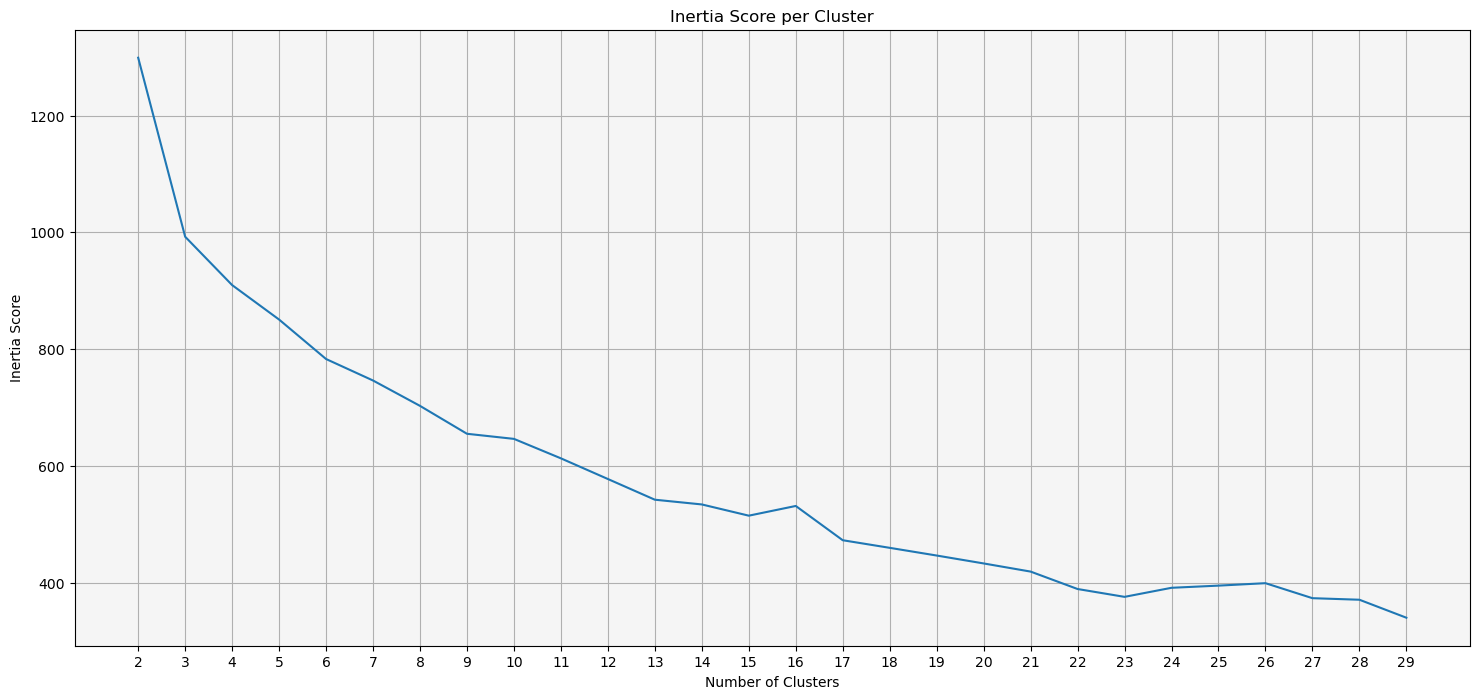

In [28]:
fig,(ax1)=plt.subplots(1,figsize=(18,8))
xx=np.arange(len(some_clusts))
ax1.plot(xx,inerti)
ax1.set_xticks(xx)
ax1.set_xticklabels(some_clusts)
ax1.grid(True)
ax1.set_facecolor('whitesmoke')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Score per Cluster')

Now, it's time to cluster our wines.

**Reducing our components into two** so we can plot them with Matplotlib

In [29]:
pc2,var=PCA(x_train,n_components=2)
compstempdf=pd.DataFrame(data=pc2,columns=["Comp_1", "Comp_2"])
compsdf=pd.concat([compstempdf,df[["Cluster"]]],axis=1)
compsdf.sample(5)

,Comp_1,Comp_2,Cluster
102,0.006804,0.681148,2
136,-3.839022,-0.166460,1
162,-2.866763,-0.502397,1
109,1.884447,0.182061,0
105,-1.596816,1.580845,2


Finally, **our wines are now clustered in three distinct groups** that we can see in the following plot.

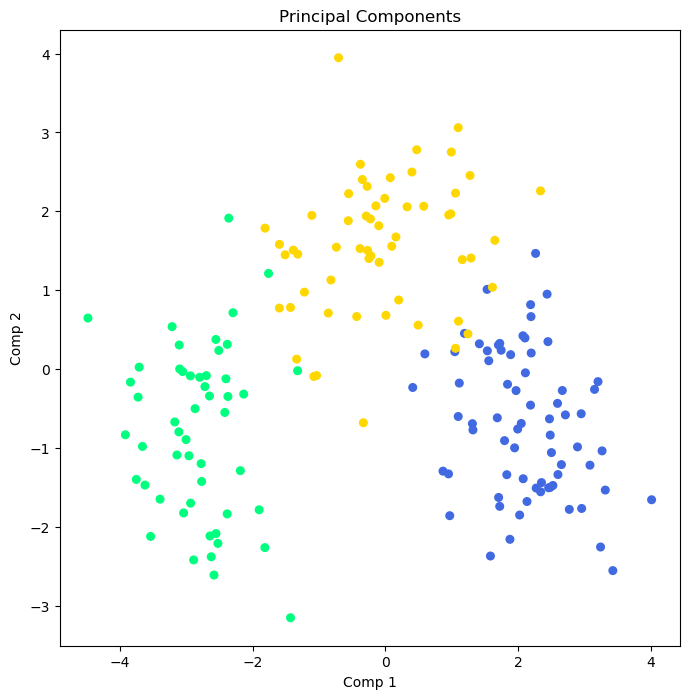

In [30]:
fig=plt.figure(figsize=(8,8))
ax2=fig.add_subplot(1,1,1)
ax2.set_title("Principal Components")
ax2.set_xlabel("Comp 1")
ax2.set_ylabel("Comp 2")
color_theme=np.array(["royalblue","springgreen","gold"])
ax2.scatter(x=compsdf.Comp_1,y=compsdf.Comp_2,c=color_theme[compsdf.Cluster],s=30)
plt.show()